# HDDA. Lab5. LDA.

## Discrimination & Classification 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, optimize
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, Y = make_blobs(n_samples=400, n_features=2, cluster_std=1.0,
                  centers=[(-5, -5), (0, 0), (5, 5)], shuffle=False, random_state=42)
color_map = dict(zip(np.unique(Y), ["red", "blue", "green"]))


{<matplotlib.collections.PathCollection at 0x7f863bd110b8>,
 <matplotlib.collections.PathCollection at 0x7f863bd11828>}

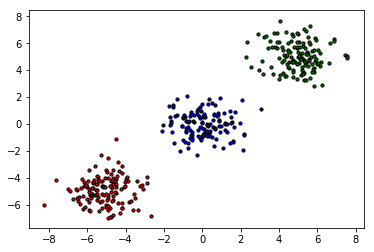

In [5]:
{plt.scatter(X[Y == k, 0], X[Y == k, 1], c=v, s=10, edgecolor='k') for (k,v) in color_map.items()}

Text(0.5,1,'LDA')

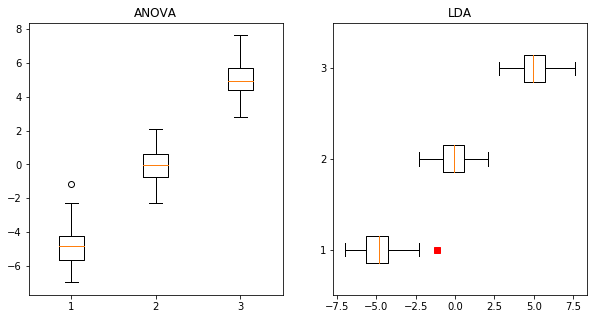

In [6]:
A = list(zip(X, Y))
bycategory = list()
for j in np.unique(Y):
    bycategory.append([k[1] for (k,v) in A if v == j])
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.boxplot(bycategory)
plt.title('ANOVA')

plt.subplot(122)
plt.boxplot(bycategory, 0, 'rs', 0)
plt.title('LDA')

LDA is like inverted ANOVA: ANOVA looks for differences in a continuous response among categories, whereas LDA infers categories using a continuous predictor. LDA assumes that the variance in each group is the same, and that the predictor(s) are normally distributed for each group. In other words, different $\mu_k$, one shared $\sigma$.

Text(0,0.5,'Probability')

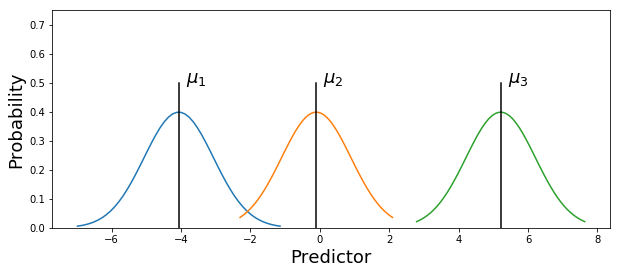

In [7]:
cdfs = list()
for i in np.unique(Y):
    cdfs.append(np.linspace(min(bycategory[i]), max(bycategory[i]), 50))
plt.figure(figsize=(10, 4))
k = 1
for x in cdfs:
    mu_k = x.mean()
    plt.plot(x, stats.norm.pdf(x, loc=mu_k))
    plt.plot([mu_k, mu_k], [0, 0.5], c='k')
    plt.text(mu_k + 0.2, 0.5, "$\mu_%i$" % k, size=18)
    k += 1
plt.ylim(0, 0.75)

plt.xlabel('Predictor', size=18)
plt.ylabel('Probability', size=18)

### Cross Validation

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import cross_validation

/home/mario/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
lda = LDA(solver='lsqr', shrinkage=None).fit(X, Y)
k_fold = cross_validation.KFold(len(A), 3, shuffle=True)
print('LDA Results: ')
for (trn, tst) in k_fold:
    lda.fit(X[trn], Y[trn])
    outVal = lda.score(X[tst], Y[tst])

print('Score: ' + str(outVal))

LDA Results: 
Score: 1.0


## LDA as projection method
[Comparison of LDA and PCA 2D projection of Iris dataset](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

explained variance ratio (first two components): [0.92461621 0.05301557]


Text(0.5,1,'LDA of IRIS dataset')

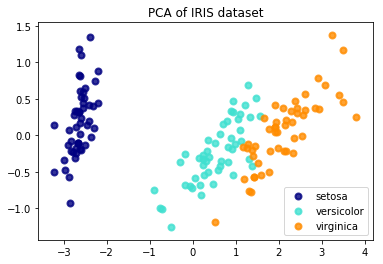

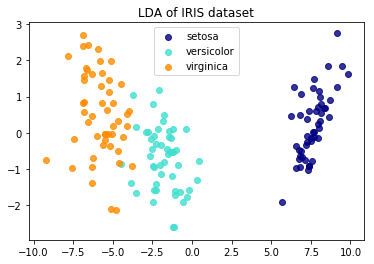

In [10]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LDA(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

## ROC curve

Provides a visual summary of the confusion matrix over a range of criteria. Given a confusion matrix, $N=TN+FP$, $P=TP+FN$.

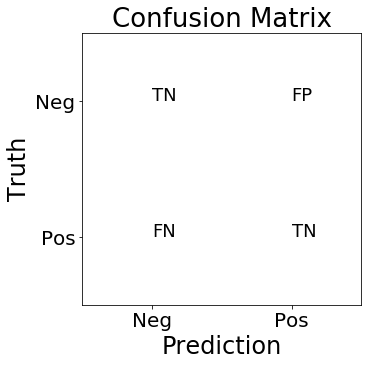

In [11]:
plt.figure(figsize=(5, 5))
plt.text(0.25, 0.75, 'TN', size=18)
plt.text(0.75, 0.75, 'FP', size=18)
plt.text(0.25, 0.25, 'FN', size=18)
plt.text(0.75, 0.25, 'TN', size=18)

plt.xticks([0.25, 0.75], ['Neg', 'Pos'], size=20)
plt.yticks([0.25, 0.75], ['Pos', 'Neg'], size=20)
plt.ylabel('Truth', size=24)
plt.xlabel('Prediction', size=24)
plt.title('Confusion Matrix', size=26)
plt.show()

The true positive rate, or Power (or Sensitivity) is $\frac{TP}{P}$ and the Type 1 error is $\frac{FP}{N}$. The ROC curve shows Power vs. Type 1 error. Ideally, we can achieve a high true positive rate at a very low false positive rate:

[ROC curve](http://arogozhnikov.github.io/2015/10/05/roc-curve.html)

### Breast cancer ROC demo

[3.35945685e-02 3.70401941e-07 9.20932053e-01 4.07599102e-08
 5.60125663e-01 7.16102248e-01 9.96670363e-01 8.25011416e-01
 2.14303993e-02 9.94633010e-01 8.64315264e-01 9.59470956e-01
 3.64491312e-03 1.93357900e-01 9.97127418e-01 9.58754207e-01
 9.89746212e-01 1.60514816e-03 3.00721600e-02 9.98723423e-01
 9.98660804e-01 9.17102701e-01 9.98157378e-01 9.56664124e-01
 7.39463819e-01 3.93842167e-01 9.86258038e-01 9.76683814e-01
 4.62307037e-06 9.98812181e-01 9.95605276e-01 9.96016681e-01
 9.61363719e-01 9.97325809e-01 9.71562661e-01 9.95624132e-01
 9.40314140e-01 9.98985174e-01 9.98553509e-01 9.52236890e-01
 9.00724034e-01 9.41606027e-01 1.38245791e-10 8.99983970e-01
 9.84151526e-01 9.20247117e-01 9.85913235e-01 9.93304844e-01
 9.84066592e-01 1.03307434e-05 9.42815548e-01 9.95461810e-01
 9.98981757e-01 1.31718435e-02 9.01157524e-01 5.74189760e-15
 6.81836151e-02 9.82053845e-01 9.92955261e-01 8.48663454e-01
 9.84236155e-01 9.74348964e-01 9.98697460e-01 6.75043500e-07
 9.79361190e-01 2.551302

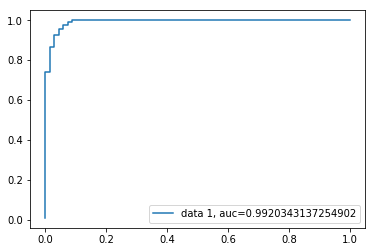

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=44)

clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[::,1]

print(y_pred_proba)

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Lab Session Task:  

Let's consider `Wine.csv`. First 13 columns i.e. independent variables are contents of wine. Last column is customer segment. It has 3 values. This is a classification problem. Our objective is to reduce 13 independent variables to `n_components`

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

In [14]:
dataset = pd.read_csv('/home/mario/hdda/inno_hdda_fall/labs/lab5/Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### Task 1: determine an effective dimension reduction (EDR)

In [15]:
# survice function for Explained variance ratio plotting
def plot_explained_variance(X):
    #Calculating Eigenvecors and eigenvalues of Covariance matrix
    mean_vec = np.mean(X, axis=0)
    cov_mat = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    # Create a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

    # Sort from high to low
    eig_pairs.sort(key = lambda x: x[0], reverse= True)

    # Calculation of Explained Variance from the eigenvalues
    tot = sum(eig_vals)
    print(tot)
    var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
    print(var_exp)
    cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
    print(cum_var_exp)
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')


13.07344632768363
[36.19884809992632, 19.207490257008903, 11.12363053624999, 7.069030182714038, 6.563293679648606, 4.935823319222562, 4.238679322623322, 2.6807489483788647, 2.2221534047897067, 1.9300190939440787, 1.736835689989916, 1.2982325756042157, 0.7952148898994494]
[ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]


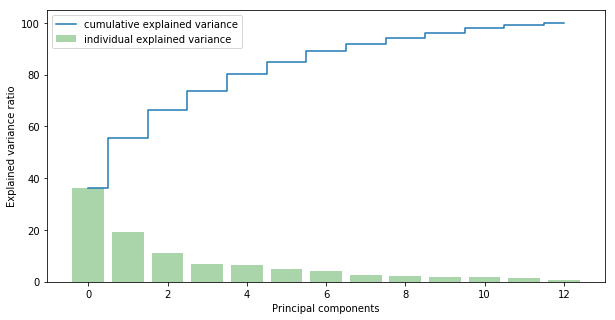

In [16]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

X_std = StandardScaler().fit_transform(X)
plot_explained_variance(X_std)

### Task 2: use you EDR for PCA n_components in a template below 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
### USE YOUR  EDR HERE (n_components) 

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [19]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

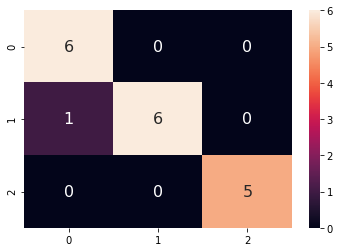

In [20]:
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

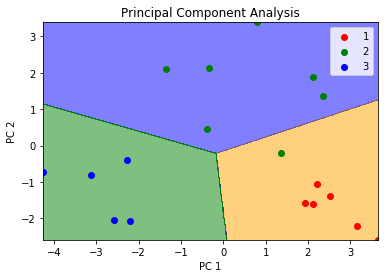

In [21]:
X_set, y_set = X_test, y_test
 
aranged_pc1 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_pc2 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_pc1, aranged_pc2)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('orange', 'blue', 'green')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Principal Component Analysis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

### Task 3: use you EDR for LDA n_components in a template below. Compare LDA with PCA

In [22]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
### USE YOUR  EDR HERE (n_components) 

lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [24]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

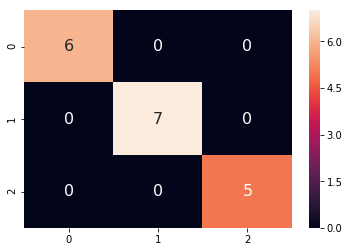

In [25]:
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

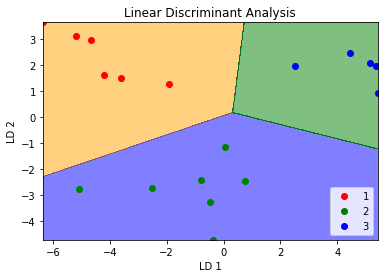

In [26]:
X_set, y_set = X_test, y_test
 
aranged_pc1 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_pc2 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_pc1, aranged_pc2)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('orange', 'blue', 'green')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Linear Discriminant Analysis')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()

## LDA performing

### Shrinkage
[Normal and Shrinkage Linear Discriminant Analysis for classification](http://scikit-learn.org/stable/auto_examples/classification/plot_lda.html)

Text(0.5,0.98,'Linear Discriminant Analysis vs. shrinkage Linear Discriminant Analysis (1 discriminative feature)')

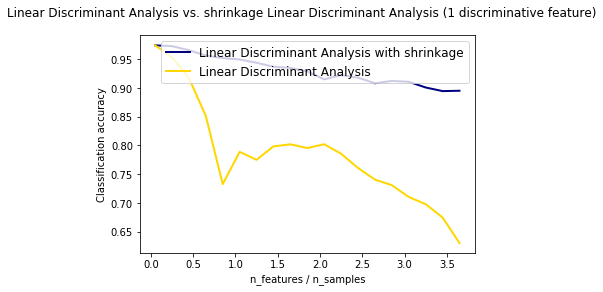

In [27]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation


def generate_data(n_samples, n_features):
    """Generate random blob-ish data with noisy features.

    This returns an array of input data with shape `(n_samples, n_features)`
    and an array of `n_samples` target labels.

    Only one feature contains discriminative information, the other features
    contain only noise.
    """
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])

    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)

        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, y)

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

features_samples_ratio = np.array(n_features_range) / n_train

plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
         label="Linear Discriminant Analysis with shrinkage", color='navy')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="Linear Discriminant Analysis", color='gold')

plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

plt.legend(loc=1, prop={'size': 12})
plt.suptitle('Linear Discriminant Analysis vs. \
shrinkage Linear Discriminant Analysis (1 discriminative feature)')


### LP problem
[Linear and Quadratic Discriminant Analysis](http://scikit-learn.org/stable/modules/lda_qda.html)

- **Quadratic Discriminant Analysis** (QDA): Each class uses its own estimate of variance (or covariance when there are multiple input variables).
- **Flexible Discriminant Analysis** (FDA): Where non-linear combinations of inputs is used such as splines.
- **Regularized Discriminant Analysis** (RDA): Introduces regularization into the estimate of the variance (actually covariance), moderating the influence of different variables on LDA.

/home/mario/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)
/home/mario/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function covariances_ is deprecated; Attribute covariances_ was deprecated in version 0.19 and will be removed in 0.21. Use covariance_ instead
  warnings.warn(msg, category=DeprecationWarning)
/home/mario/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function covariances_ is deprecated; Attribute covariances_ was deprecated in version 0.19 and will be removed in 0.21. Use covariance_ instead
  warnings.warn(msg, category=DeprecationWarning)
/home/mario/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be rem

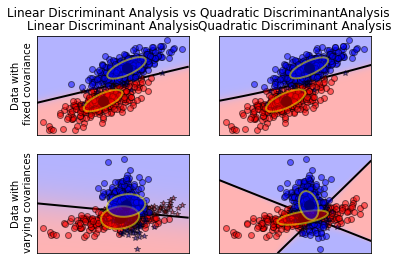

In [28]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red', markeredgecolor='k')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000', markeredgecolor='k')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue', markeredgecolor='k')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099', markeredgecolor='k')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariances_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariances_[1], 'blue')

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariances=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant'
             'Analysis')
plt.show()

## Home Assignment. Linear DA vs. Quadratic DA. (for all)

In [29]:
import pandas as pd
dataset = pd.read_csv('/home/mario/hdda/inno_hdda_fall/labs/lab5/Hemocrit.csv').dropna()

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 3 columns):
Unnamed: 0    200 non-null int64
hemocrit      200 non-null float64
status        200 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 6.2+ KB


In [31]:
dataset.head()

,Unnamed: 0,hemocrit,status
0,1,47.215092,Clean
1,2,47.720486,Clean
2,3,47.838542,Clean
3,4,47.709403,Clean
4,5,47.932468,Clean


In [32]:
np.unique(dataset['status'])

array(['Cheat', 'Clean'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder

y = dataset.status.values
X = dataset.drop(['Unnamed: 0', 'status'], axis=1).values

#### Task 1: Implement your LDA function using template below

In [34]:
class LDA():
    def __init__(self, n_components=None):
        self.n_components = n_components
        
    def fit(self, X, y):
        self.class_labels, self.class_priors = np.unique(y, return_counts=True)
        self.class_priors = self.class_priors / y.shape[0]
        
        self.cov = np.cov(X.T)
        
        n_classes = self.class_labels.shape[0]
        self.mean_vectors = []
        for cl in self.class_labels:
            self.mean_vectors.append(np.mean(X[y==cl], axis=0))
            
        n_features = X.shape[1]
        S_W = np.zeros((n_features, n_features))
        for cl, mv in zip(self.class_labels, self.mean_vectors):
            class_sc_mat = np.zeros((n_features, n_features))                 
            for row in X[y == cl]:
                row, mv = row.reshape(n_features, 1), mv.reshape(n_features, 1)
                class_sc_mat += (row-mv).dot((row-mv).T)
            S_W += class_sc_mat 
        
        overall_mean = np.mean(X, axis=0)  
        S_B = np.zeros((n_features, n_features))
        for i, mean_vec in enumerate(self.mean_vectors):  
            n = X[y==i+1,:].shape[0]
            mean_vec = mean_vec.reshape(n_features, 1)
            overall_mean = overall_mean.reshape(n_features, 1)
            S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
            
        eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
        return eig_vals, eig_vecs
        
        
    def predict(self, X_train):
        labels = []

        for i in range(X_train.shape[0]):
            labels.append(self.predict_sample(X_train[i]))
        
        return np.array(labels)
    
    def predict_sample(self, X):
        max_label = 0
        max_likelihood = 0
        
        if self.cov.size ==1:
            for k in range(len(self.class_labels)):
                cons = 1./((2*np.pi)**(len(X)/2.)*self.cov**(-0.5))
                likelihood  = cons * np.exp(-np.dot(np.dot((X - self.mean_vectors[k]), 1/self.cov),(X - self.mean_vectors[k]).T)/2.)
            
            if likelihood > max_likelihood:
                max_label = self.class_labels[k]
                max_likelihood = likelihood
        
            return max_label
        else:
            for k in range(len(self.class_labels)):
                cons = 1./((2*np.pi)**(len(X)/2.)*np.linalg.det(self.cov)**(-0.5))
                likelihood  = cons * np.exp(-np.dot(np.dot((X - self.mean_vectors[k]), np.linalg.inv(self.cov)),(X - self.mean_vectors[k]).T)/2.)
            
                if likelihood > max_likelihood:
                    max_label = self.class_labels[k]
                    max_likelihood = likelihood
        
            return max_label
        
    def predict_prob(self, x, criterion=None):
        if criterion:
            return self.class_labels[criterion(self.posterior(x))]
        return self.posterior(x)[1]
            
    def posterior(self, x):
        if self.cov.size ==1:
            post_values = [1./((2*np.pi)**(len(x)/2.)*self.cov**(-0.5)) * np.exp(-np.dot(np.dot((x - self.mean_vectors[i]), 1/self.cov),(x - self.mean_vectors[i]).T)/2.) 
                       for i in range(len(self.class_labels))]
        else:
            post_values = [1./((2*np.pi)**(len(x)/2.)*np.linalg.det(self.cov)**(-0.5)) * np.exp(-np.dot(np.dot((x - self.mean_vectors[i]), np.linalg.inv(self.cov)),(x - self.mean_vectors[i]).T)/2.) 
                       for i in range(len(self.class_labels))]
        return [pv/sum(post_values) for pv in post_values]
    
    def fit_transform(self, X, y):
        n_features = X.shape[1]
        eig_vals, eig_vecs = self.fit(X, y)
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
        eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
        W = np.hstack([eig_pairs[i][1].reshape(n_features, 1) for i in range(0, self.n_components)])
        return X.dot(W)
    

In [35]:
#### Implement your QDA function using template below

In [36]:
class QDA():
    def __init__(self, n_components=None):
        self.n_components = n_components
        
    def fit(self, X, y):
        self.class_labels, self.class_priors = np.unique(y, return_counts=True)
        self.class_priors = self.class_priors / y.shape[0]
        
        self.cov = []
        
        n_classes = self.class_labels.shape[0]
        self.mean_vectors = []
        for cl in self.class_labels:
            self.mean_vectors.append(np.mean(X[y==cl], axis=0))
            self.cov.append(np.cov(X[y==cl].T))
            
        n_features = X.shape[1]
        S_W = np.zeros((n_features, n_features))
        for cl, mv in zip(self.class_labels, self.mean_vectors):
            class_sc_mat = np.zeros((n_features, n_features))                 
            for row in X[y == cl]:
                row, mv = row.reshape(n_features, 1), mv.reshape(n_features, 1)
                class_sc_mat += (row-mv).dot((row-mv).T)
            S_W += class_sc_mat 
        
        overall_mean = np.mean(X, axis=0)  
        S_B = np.zeros((n_features, n_features))
        for i, mean_vec in enumerate(self.mean_vectors):  
            n = X[y==i+1,:].shape[0]
            mean_vec = mean_vec.reshape(n_features, 1)
            overall_mean = overall_mean.reshape(n_features, 1)
            S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
            
        eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
        return eig_vals, eig_vecs
        
        
    def predict(self, X_train):
        labels = []

        for i in range(X_train.shape[0]):
            labels.append(self.predict_sample(X_train[i]))
        
        return np.array(labels)
    
    def predict_sample(self, X):
        max_label = 0
        max_likelihood = 0

        if self.cov[0].size ==1:
            for k in range(len(self.class_labels)):
                cons = 1./((2*np.pi)**(len(X)/2.)*self.cov[k]**(-0.5))
                likelihood  = cons * np.exp(-np.dot(np.dot((X - self.mean_vectors[k]), 1/self.cov[k]),(X - self.mean_vectors[k]).T)/2.)
            
            if likelihood > max_likelihood:
                max_label = self.class_labels[k]
                max_likelihood = likelihood
        
            return max_label
        else:
            for k in range(len(self.class_labels)):
                cons = 1./((2*np.pi)**(len(X)/2.)*np.linalg.det(self.cov[k])**(-0.5))
                likelihood  = np.exp(-np.dot(np.dot((X - self.mean_vectors[k]), np.linalg.inv(self.cov[k])),(X - self.mean_vectors[k]).T)/2.)
            
                if likelihood > max_likelihood:
                    max_label = self.class_labels[k]
                    max_likelihood = likelihood
        
            return max_label
        
    def predict_prob(self, x, criterion=None):
        if criterion:
            return self.class_labels[criterion(self.posterior(x))]
        return self.posterior(x)[1]
            
    def posterior(self, x):
        if self.cov[0].size ==1:
            post_values = [1./((2*np.pi)**(len(x)/2.)*self.cov[i]**(-0.5)) * np.exp(-np.dot(np.dot((x - self.mean_vectors[i]), 1/self.cov[i]),(x - self.mean_vectors[i]).T)/2.) 
                       for i in range(len(self.class_labels))]
        else:
            post_values = [1./((2*np.pi)**(len(x)/2.)*np.linalg.det(self.cov[i])**(-0.5)) * np.exp(-np.dot(np.dot((x - self.mean_vectors[i]), np.linalg.inv(self.cov[i])),(x - self.mean_vectors[i]).T)/2.) 
                       for i in range(len(self.class_labels))]
        return [pv/sum(post_values) for pv in post_values]
    
    def fit_transform(self, X, y):
        n_features = X.shape[1]
        eig_vals, eig_vecs = self.fit(X, y)
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
        eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
        W = np.hstack([eig_pairs[i][1].reshape(n_features, 1) for i in range(0, self.n_components)])
        return X.dot(W)

#### Task 2: Dataset prediction
- Separate your `dataset` into train, test subsets
- Predict by using LDA
- Predict by using QDA

In [37]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)
  
## Train Test Split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model_lda = LDA(1)
proj_lda = model_lda.fit_transform(X_train, y_train)

pred_prob_lda = np.array([model_lda.predict_prob(x) for x in X_test])

predictions_lda = model_lda.predict(X_test)

print(predictions_lda)

print(y_test)

truth = y_test

confusion = pd.DataFrame(np.array([predictions_lda, truth]).T, columns=('Prediction', 'Truth'))

confusion.groupby('Prediction').Truth.value_counts()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1]


Prediction  Truth
1           1        38
            0         2
Name: Truth, dtype: int64

In [38]:
model_qda = QDA(1)
proj_qda = model_qda.fit_transform(X_train, y_train)

predictions_qda = model_qda.predict(X_test)
pred_prob_qda = np.array([model_qda.predict_prob(x) for x in X_test])

print(predictions_qda)

print(y_test)

truth = y_test

confusion = pd.DataFrame(np.array([predictions_qda, truth]).T, columns=('Prediction', 'Truth'))

confusion.groupby('Prediction').Truth.value_counts()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1]


Prediction  Truth
1           1        38
            0         2
Name: Truth, dtype: int64

#### Task 3: Plot ROC curves for LDA and QDA

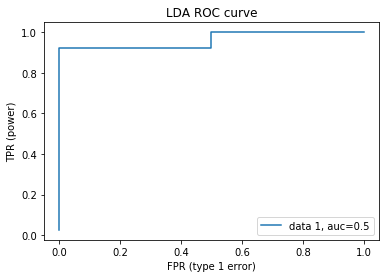

In [39]:
plt.title('LDA ROC curve')

fpr, tpr, _ = roc_curve(y_test,  pred_prob_lda)
auc = roc_auc_score(y_test, predictions_lda)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)


plt.ylabel('TPR (power)')
plt.xlabel('FPR (type 1 error)')
plt.show()

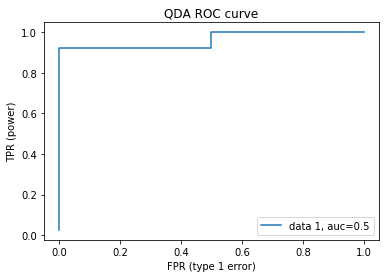

In [40]:
plt.title('QDA ROC curve')

fpr, tpr, _ = roc_curve(y_test,  pred_prob_qda)
auc = roc_auc_score(y_test, predictions_qda)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)


plt.ylabel('TPR (power)')
plt.xlabel('FPR (type 1 error)')
plt.show()

test for Iris data

In [41]:
iris = pd.read_csv('/home/mario/Downloads/iris.csv')
iris.head()

# extract sepal length and sepal width of setosa and versicolor for our binary calssification problem
X = iris.iloc[0:100, [0, 1]].values

y = iris.iloc[0:100, 4].values
# set output lable value to 1 if it is setosa and 0 if versicolor.
y = np.where(y == 'setosa', 1, 0)

In [42]:
# features standerdization
X_std = np.copy(X)

X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20) 

In [44]:
mod_lda = LDA(2)
proj_lda = mod_lda.fit_transform(X_train, y_train)

pred_lda = mod_lda.predict(X_test)
pred_prob_lda = np.array([mod_lda.predict_prob(x) for x in X_test])

print(pred_lda)

print(y_test)


truth = y_test

confusion = pd.DataFrame(np.array([pred_lda, truth]).T, columns=('Prediction', 'Truth'))

confusion.groupby('Prediction').Truth.value_counts()

[0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0]
[0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0]


Prediction  Truth
0           0        10
1           1        10
Name: Truth, dtype: int64

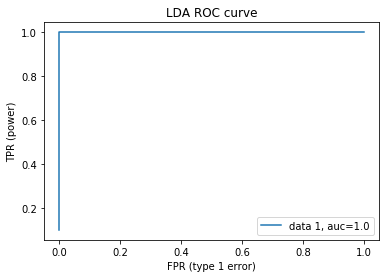

In [45]:
plt.title('LDA ROC curve')

fpr, tpr, _ = roc_curve(y_test,  pred_prob_lda)
auc = roc_auc_score(y_test, pred_lda)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)


plt.ylabel('TPR (power)')
plt.xlabel('FPR (type 1 error)')
plt.show()

In [46]:
mod_qda = QDA(2)
proj_qda = mod_qda.fit_transform(X_train, y_train)

pred_qda = mod_qda.predict(X_test)
pred_prob_qda = np.array([mod_qda.predict_prob(x) for x in X_test])

print(pred_qda)

print(y_test)

truth = y_test

confusion = pd.DataFrame(np.array([pred_qda, truth]).T, columns=('Prediction', 'Truth'))

confusion.groupby('Prediction').Truth.value_counts()

[0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0]
[0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0]


Prediction  Truth
0           0        10
1           1        10
Name: Truth, dtype: int64

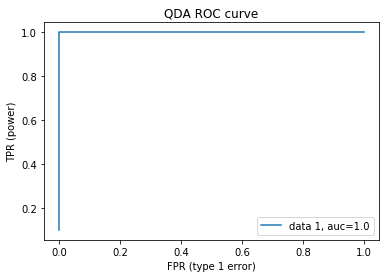

In [47]:
plt.title('QDA ROC curve')

fpr, tpr, _ = roc_curve(y_test,  pred_prob_qda)
auc = roc_auc_score(y_test, pred_qda)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)


plt.ylabel('TPR (power)')
plt.xlabel('FPR (type 1 error)')
plt.show()

## Home Assignment. Addition for champions.

#### Extra task for champions
- Perform your LDA by second reguralization parameter (Shrinkage)
- Perform your QDA by second reguralization parameter (Shrinkage)
- Demonstrate how does it work on `make_blobs` example (see template)

[template](http://scikit-learn.org/stable/auto_examples/classification/plot_lda.html)